In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
import pickle

data = {}
data['Normal'] = pickle.load(open('predictions/normal-sparse-static.pkl','r'))
data['Transfer'] = pickle.load(open('predictions/transfer-sparse-static.pkl','r'))

In [8]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

In [21]:
best_params = {
    'Normal':{'Without':0.1, 'With':0.01},
    'Transfer':{'Without':0.1, 'With':0.01}
}

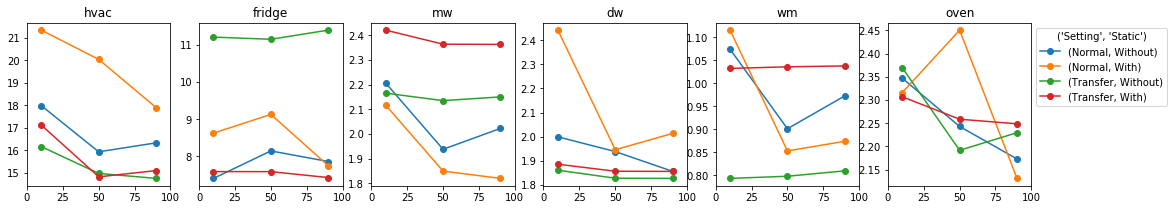

In [22]:
fig, ax = plt.subplots(figsize=(18, 3), ncols=6)
for setting in ['Normal','Transfer']:
    for static in ['Without', 'With']:
        if static=='Without':
            static_param = None
        else:
            static_param = 'static'
        df = pd.Panel(data[setting][static_param][best_params[setting][static]][2]).mean(axis=0)
        for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
            df[appliance].plot(ax=ax[i], title=appliance, label=(setting, static), marker='o')
            ax[i].set_xlim((0, 100))
plt.legend(bbox_to_anchor=(1,1), title=('Setting', 'Static'))